In [ ]:
# 1. Importing libraries

import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report

import tensorflow as tf
from tensorflow.keras import models, layers, datasets

In [ ]:
# 2. Loading dataset <-- CIFAR10 dataset consists of 60k images in 10 classes where pixel size=32*32 & CIFAR100 also there with 100 classes

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
# 3. Testing the sizes of the samples

print ("Size of the training features is ", X_train.shape)
print ("Size of the training labels is ", y_train.shape)
print ('\n')
print ("Size of the testing features is ", X_test.shape)
print ("Size of the testing labels is ", y_test.shape)

Size of the training features is  (50000, 32, 32, 3)
Size of the training labels is  (50000, 1)


Size of the testing features is  (10000, 32, 32, 3)
Size of the testing labels is  (10000, 1)


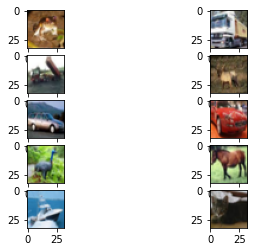

In [ ]:
# 4. Visualizing first 5 images

for i in range(10):
  plt.subplot(5, 2, i+1)
  plt.imshow(X_train[i])

In [ ]:
# 5. Normalization of features and 2D->1D change for labels

X_train_norm = X_train / 255.
X_test_norm = X_test / 255.

y_train_1D = y_train.reshape(-1,) 

In [ ]:
# 6. Simple ANN model training

ann_model = models.Sequential ([
                              layers.Flatten(input_shape=(32,32,3)),
                              layers.Dense(3000, activation='relu'),
                              layers.Dense(2000, activation='relu'),
                              layers.Dense(1000, activation='relu'),
                              layers.Dense(10, activation='softmax')
                          ])

print (ann_model.summary())

print ("\n-------------------------------------- Training Phase --------------------------------------\n")

ann_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_model.fit(X_train_norm, y_train_1D, epochs=10)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_72 (Dense)             (None, 3000)              9219000   
_________________________________________________________________
dense_73 (Dense)             (None, 2000)              6002000   
_________________________________________________________________
dense_74 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_75 (Dense)             (None, 10)                10010     
Total params: 17,232,010
Trainable params: 17,232,010
Non-trainable params: 0
_________________________________________________________________
None

-------------------------------------- Training Phase --------------------------------------

Epoch 1

In [ ]:
# 7. This simple ANN model evaluation criteria in a classification report

y_pred = ann_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report is : \n", classification_report(y_test, y_pred_classes))
print ("\nConfusion Matrix is : \n", confusion_matrix(y_test, y_pred_classes))

Classification Report is : 
               precision    recall  f1-score   support

           0       0.48      0.53      0.50      1000
           1       0.60      0.58      0.59      1000
           2       0.48      0.20      0.28      1000
           3       0.25      0.40      0.30      1000
           4       0.73      0.10      0.17      1000
           5       0.35      0.34      0.35      1000
           6       0.83      0.05      0.10      1000
           7       0.71      0.41      0.52      1000
           8       0.39      0.82      0.53      1000
           9       0.34      0.71      0.46      1000

    accuracy                           0.41     10000
   macro avg       0.52      0.41      0.38     10000
weighted avg       0.52      0.41      0.38     10000


Confusion Matrix is : 
 [[525  31   4  25   0   5   0   5 297 108]
 [ 17 577   0  13   0   6   0   5 130 252]
 [165  30 196 188  12 138   6  29 121 115]
 [ 60  34  13 401   2 161   1  15 129 184]
 [110  43 112 1

In [ ]:
# 8. Simple CNN model training

cnn_model = models.Sequential([
                               layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
                               layers.MaxPooling2D((2, 2)),

                               layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                               layers.MaxPooling2D((2, 2)),

                               layers.Flatten(),
                               layers.Dense(64, activation='relu'),
                               layers.Dense(10, activation='softmax')
])


print (cnn_model.summary())

print ("\n-------------------------------------- Training Phase --------------------------------------\n")

cnn_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train_norm, y_train_1D, epochs=10)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_77 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_78 (Dense)             (None, 10)              

In [ ]:
# 9. This simple CNN model evaluation criteria in a classification report

y_pred = cnn_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report is : \n", classification_report(y_test, y_pred_classes))
print ("\nConfusion Matrix is : \n", confusion_matrix(y_test, y_pred_classes))

Classification Report is : 
               precision    recall  f1-score   support

           0       0.32      0.87      0.46      1000
           1       0.56      0.67      0.61      1000
           2       0.66      0.10      0.18      1000
           3       0.40      0.29      0.33      1000
           4       0.65      0.02      0.04      1000
           5       0.44      0.51      0.47      1000
           6       0.83      0.25      0.38      1000
           7       0.57      0.65      0.61      1000
           8       0.71      0.45      0.55      1000
           9       0.40      0.77      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.55      0.46      0.42     10000
weighted avg       0.55      0.46      0.42     10000


Confusion Matrix is : 
 [[869  28   3   3   0   2   0   9  20  66]
 [ 86 672   0   3   0   3   2   3  27 204]
 [399  45 103  82   3 162  12  73  21 100]
 [169  35   9 287   3 193  13  73  35 183]
 [367  64  18  

In [ ]:
# 10. Comparison between ANN and CNN model

print ("ANN model results : ",ann_model.evaluate(X_test, y_test))
print ("CNN model results : ",cnn_model.evaluate(X_test, y_test))

313/313 [==============================] - 2s 5ms/step - loss: 272.0356 - accuracy: 0.4131
ANN model results :  [272.03558349609375, 0.413100004196167]
313/313 [==============================] - 1s 3ms/step - loss: 252.3180 - accuracy: 0.4573
CNN model results :  [252.31802368164062, 0.45730000734329224]


CNN model training time is faster than ANN model training time

CNN model parameters(167,562) are lower than ANN model parameters(17,232,010)

CNN model accuracy is higher than the ANN model